# Analyze unit info df

## TODO

## Setup

### Start DJD
Run main.py as interactive (-i) module (-m) and remotely (-r)\
NOTE: any code inside the DJD-executing cell other than the executing line is not allowed

In [1]:
run -im djd.main -- --dbname=dj_hmov --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_hmov' as 'write@10.153.173.165'


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from djd import hmov_models
from djd import hmov_unit
from l6s import l6s_utils # Layer 6 suppression code repo with utility functions for plotting unit overview

# This import does not seem to work - WHY? works for other DJD modules and functions - circular import?
# from djd.hmov_unit import get_tranges_hmov, _get_xptranges  

In [3]:
%load_ext autoreload
%autoreload 2

## Get unit info df

In [4]:
# Get unit info df
unit_info = l6s_utils.get_combined_unit_info(load_df_name='unit_info_20210129')
unit_info

get_combined_unit_info(): Getting combined unit info.
  Loading previous mseu df file:
   /Users/ybauer/GDrive/BBE_BusseBerensEuler/projects/ct-fb_L6_suppression/analyses/L6_suppression/l6s/unit_crit_and_type_info/data/unit_info_20210129.csv


,m,s,e,u,s_region,e_name,OSI_ctrl,OSI_opto,DSI_ctrl,DSI_opto,...,tun_rsq_opto,c_zscore,fr_mean,fr_ctrl,fr_opto,fr_spon_ctrl,fr_spon_opto,OMI,SNR_opto,SNR_ctrl
0,Ntsr1Cre_2019_0002,3,1,13,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ntsr1Cre_2019_0002,3,1,14,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ntsr1Cre_2019_0002,3,1,19,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ntsr1Cre_2019_0002,3,1,30,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ntsr1Cre_2019_0002,3,1,40,LGN,AsparseNoise5_60deg,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,Ntsr1Cre_2020_0003,2,17,140,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,0.421520,0.840047,0.002993,NaN,NaN,-0.992899,NaN,NaN
2677,Ntsr1Cre_2020_0003,2,17,141,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,2.764570,2.854360,2.674780,NaN,NaN,-0.032479,NaN,NaN
2678,Ntsr1Cre_2020_0003,2,17,142,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,7.063575,5.776570,8.350580,NaN,NaN,0.182203,NaN,NaN
2679,Ntsr1Cre_2020_0003,2,17,144,V1,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,3.044920,3.047910,3.041930,NaN,NaN,-0.000982,NaN,NaN


In [5]:
unit_info.keys()

Index(['m', 's', 'e', 'u', 's_region', 'e_name', 'OSI_ctrl', 'OSI_opto', 'DSI_ctrl', 'DSI_opto', 'sbc_zscore', 'sbc_method', 'sbc', 'chirp_type', 'wave_type', 'burst_ratio_ctrl', 'burst_ratio_opto',
       'tun_model', 'tun_rsq_ctrl', 'tun_rsq_opto', 'c_zscore', 'fr_mean', 'fr_ctrl', 'fr_opto', 'fr_spon_ctrl', 'fr_spon_opto', 'OMI', 'SNR_opto', 'SNR_ctrl'],
      dtype='object')

## Check OSI/DSI in opto vs control
NOTES
- include all duplicate expts for now

In [6]:
df = unit_info[unit_info['OSI_ctrl'].notna()][['m', 's', 'u', 'OSI_ctrl', 'OSI_opto', 'DSI_ctrl', 'DSI_opto', 'OMI', 'sbc_zscore']]
df

,m,s,u,OSI_ctrl,OSI_opto,DSI_ctrl,DSI_opto,OMI,sbc_zscore
16,Ntsr1Cre_2019_0002,3,13,0.058347,0.015818,0.003239,0.081268,NaN,3.288161
17,Ntsr1Cre_2019_0002,3,14,0.019194,0.067131,0.093939,0.070952,NaN,7.661878
18,Ntsr1Cre_2019_0002,3,19,0.132265,0.150986,0.242817,0.033709,NaN,4.236185
19,Ntsr1Cre_2019_0002,3,30,0.122563,0.020055,0.086487,0.127151,NaN,5.810582
20,Ntsr1Cre_2019_0002,3,40,0.030719,0.052259,0.101183,0.115787,NaN,6.814885
...,...,...,...,...,...,...,...,...,...
2330,Ntsr1Cre_2020_0003,2,140,0.170723,NaN,0.249979,NaN,-1.000000,-4.116580
2331,Ntsr1Cre_2020_0003,2,141,0.024439,0.221922,0.153650,0.159621,0.015022,-1.495771
2332,Ntsr1Cre_2020_0003,2,142,0.067109,0.215459,0.390109,0.009746,0.564595,-0.381187
2333,Ntsr1Cre_2020_0003,2,144,0.127381,0.117249,0.012778,0.004852,0.111656,4.357320


### Check OSI/DSI opto vs control against OMI

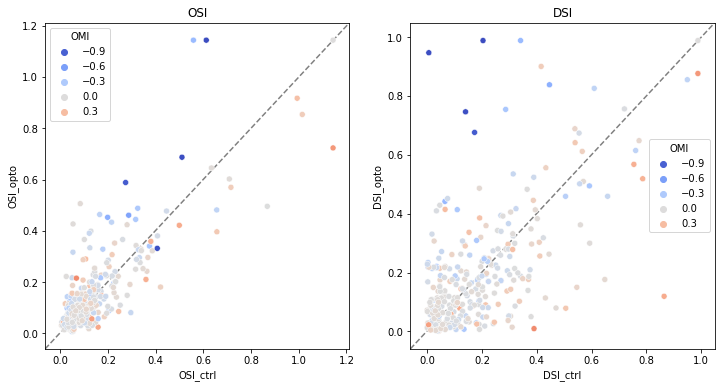

In [15]:
# Plot OSI/DSI opto vs control + OMIs
fig, axs = plt.subplots(1,2, figsize=(12,6))

# OSI
sns.scatterplot(data=df, x='OSI_ctrl', y='OSI_opto', hue='OMI', palette='coolwarm', hue_norm=(-1,1), ax=axs[0]);
axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0].transAxes, zorder=-1)
axs[0].set_title('OSI')

# DSI
sns.scatterplot(data=df, x='DSI_ctrl', y='DSI_opto', hue='OMI', palette='coolwarm', hue_norm=(-1,1), ax=axs[1]);
axs[1].set_title('DSI')
axs[1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1].transAxes, zorder=-1);

### Check OSI/DSI opto vs control against SbC scores

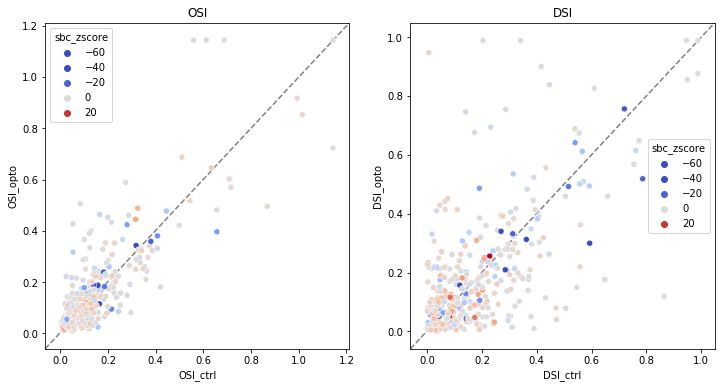

In [38]:
# Plot OSI/DSI opto vs control + SbC scores
fig, axs = plt.subplots(1,2, figsize=(12,6))

# Find normalization range
norm = np.mean(df.sbc_zscore.values) + 3 * np.std(df.sbc_zscore.values)
# OSI
sns.scatterplot(data=df, x='OSI_ctrl', y='OSI_opto', hue='sbc_zscore', palette='coolwarm', hue_norm=(-norm,norm), ax=axs[0]);
axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0].transAxes, zorder=-1)
axs[0].set_title('OSI')

# DSI
sns.scatterplot(data=df, x='DSI_ctrl', y='DSI_opto', hue='sbc_zscore', palette='coolwarm', hue_norm=(-norm,norm), ax=axs[1]);
axs[1].set_title('DSI')
axs[1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1].transAxes, zorder=-1);

### Check OSI/DSI against chirp type

In [40]:
chirp_df = unit_info[unit_info['chirp_type'].notna()][['m', 's', 'u', 'chirp_type']]
chirp_df

,m,s,u,chirp_type
40,Ntsr1Cre_2019_0002,3,13,ON-sust.
41,Ntsr1Cre_2019_0002,3,14,ON-OFF-trans.
42,Ntsr1Cre_2019_0002,3,19,mixed
43,Ntsr1Cre_2019_0002,3,30,ON-OFF-trans.
44,Ntsr1Cre_2019_0002,3,40,ON-OFF-trans.
...,...,...,...,...
2109,Ntsr1Cre_2020_0002,6,18,ON-OFF-trans.
2110,Ntsr1Cre_2020_0002,6,23,OFF-sust.
2111,Ntsr1Cre_2020_0002,6,26,mixed
2112,Ntsr1Cre_2020_0002,6,27,ON-sust.


In [41]:
# Merge chirp type info
df = df.merge(chirp_df, on=['m','s','u'], how='left')
df

,m,s,u,OSI_ctrl,OSI_opto,DSI_ctrl,DSI_opto,OMI,sbc_zscore,chirp_type
0,Ntsr1Cre_2019_0002,3,13,0.058347,0.015818,0.003239,0.081268,NaN,3.288161,ON-sust.
1,Ntsr1Cre_2019_0002,3,14,0.019194,0.067131,0.093939,0.070952,NaN,7.661878,ON-OFF-trans.
2,Ntsr1Cre_2019_0002,3,19,0.132265,0.150986,0.242817,0.033709,NaN,4.236185,mixed
3,Ntsr1Cre_2019_0002,3,30,0.122563,0.020055,0.086487,0.127151,NaN,5.810582,ON-OFF-trans.
4,Ntsr1Cre_2019_0002,3,40,0.030719,0.052259,0.101183,0.115787,NaN,6.814885,ON-OFF-trans.
...,...,...,...,...,...,...,...,...,...,...
348,Ntsr1Cre_2020_0003,2,140,0.170723,NaN,0.249979,NaN,-1.000000,-4.116580,NaN
349,Ntsr1Cre_2020_0003,2,141,0.024439,0.221922,0.153650,0.159621,0.015022,-1.495771,NaN
350,Ntsr1Cre_2020_0003,2,142,0.067109,0.215459,0.390109,0.009746,0.564595,-0.381187,NaN
351,Ntsr1Cre_2020_0003,2,144,0.127381,0.117249,0.012778,0.004852,0.111656,4.357320,NaN


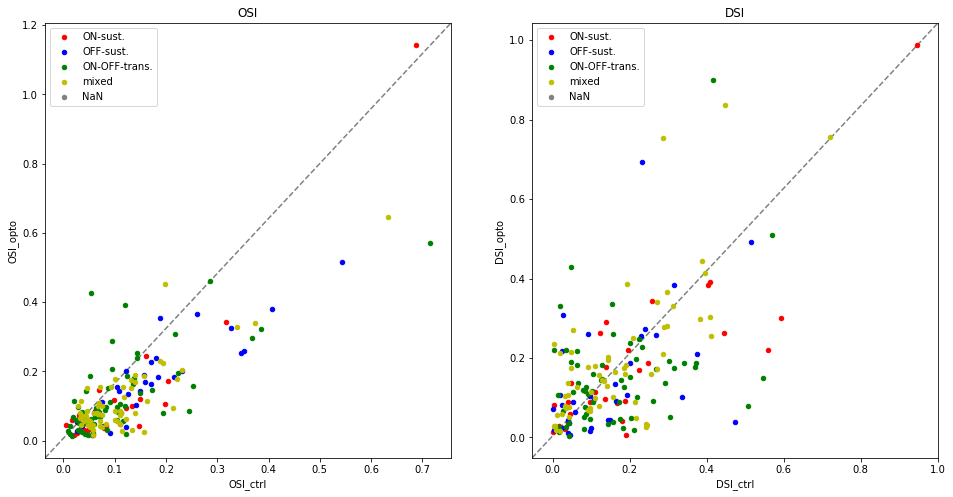

In [42]:
# Plot OSI/DSI opto vs control + SbC scores
fig, axs = plt.subplots(1,2, figsize=(16,8))

# OSI
df[df['chirp_type']=='ON-sust.'].plot.scatter(x='OSI_ctrl', y='OSI_opto', c='r', ax=axs[0], label='ON-sust.');
df[df['chirp_type']=='OFF-sust.'].plot.scatter(x='OSI_ctrl', y='OSI_opto', c='b', ax=axs[0], label='OFF-sust.');
df[df['chirp_type']=='ON-OFF-trans.'].plot.scatter(x='OSI_ctrl', y='OSI_opto', c='g', ax=axs[0], label='ON-OFF-trans.');
df[df['chirp_type']=='mixed'].plot.scatter(x='OSI_ctrl', y='OSI_opto', c='y', ax=axs[0], label='mixed');
df[df['chirp_type']==np.nan].plot.scatter(x='OSI_ctrl', y='OSI_opto', c='grey', ax=axs[0], label='NaN');
axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[0].transAxes, zorder=-1)
axs[0].set_title('OSI')


# # DSI
df[df['chirp_type']=='ON-sust.'].plot.scatter(x='DSI_ctrl', y='DSI_opto', c='r', ax=axs[1], label='ON-sust.');
df[df['chirp_type']=='OFF-sust.'].plot.scatter(x='DSI_ctrl', y='DSI_opto', c='b', ax=axs[1], label='OFF-sust.');
df[df['chirp_type']=='ON-OFF-trans.'].plot.scatter(x='DSI_ctrl', y='DSI_opto', c='g', ax=axs[1], label='ON-OFF-trans.');
df[df['chirp_type']=='mixed'].plot.scatter(x='DSI_ctrl', y='DSI_opto', c='y', ax=axs[1], label='mixed');
df[df['chirp_type']==np.nan].plot.scatter(x='DSI_ctrl', y='DSI_opto', c='grey', ax=axs[1], label='NaN');
axs[1].plot([0, 1], [0, 1], color='grey', linestyle='--', transform=axs[1].transAxes, zorder=-1)
axs[1].set_title('DSI')

plt.legend();

## Check OSI DSI per unit against hmov model prediction quality - are high OSI/DSI cells harder to predict?
NOTES
- analysis moved to ana_hmov_X_unit_info